# PREDICTING HOUSE PRICES USING MACHINE LEARNING 

# Phase 4 : Development Part 2

In this part We will continue building your project. 

Continue building the house price prediction model by 

Feature selection 

Model training 

Evaluation. 



Dataset Link: https://www.kaggle.com/datasets/vedavyasv/usa-housing 

# I.IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# II.LOADING THE DATASET

In [2]:
# Load the housing dataset
dataset = pd.read_csv("USA_Housing.csv")

In [3]:
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# III. DATA EXPLORATION

In [4]:
# Generate dataset description for numerical columns
numeric_description = dataset.describe()

# Generate dataset description for all columns (including categorical)
all_description = dataset.describe(include='all')

# Print the descriptions
print("Summary Statistics for Numerical Columns:")
print(numeric_description)

print("\nSummary Statistics for All Columns:")
print(all_description)

Summary Statistics for Numerical Columns:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min   

# IV. DATA PREPROCESSING

i)HANDLING MISSING VALUES

In [5]:
# Drop rows with missing values
dataset = dataset.dropna()
# Impute missing values with the mean
dataset = dataset.fillna(method='ffill')

ii)HANDLING CATEGORICAL VALUES

Dummy variables are used for categorical data.For continuous numerical variables like "Avg. Area Income" or "Price", no dummy variables are needed.

iii)SCALLING THE DATA

In [6]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop('Address', axis=1))

# V. FEATURE SELECTION

In [7]:
features = ["Avg. Area Income", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]
X = dataset[features]
y = dataset["Price"]

->The features variable holds the list of features that will be used to train the model.

->The X variable holds the data for the features.

->The y variable holds the target variable, which is the house price.

# VI. SPLITTING THE DATA INTO TRAINING SETS AND TESTING SETS

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, dataset['Price'], test_size=0.25, random_state=42)

->X_scaled: This is the scaled feature data.

->dataset['Price']: This is the target variable, which is the house price.

->test_size=0.25: This specifies that 25% of the data will be included in the test set.

->random_state=42: This ensures that the data is split in a reproducible way.

# VII. CREATING A SVM MODEL(SUPPORT VECTOR MACHINE)

The svr variable is an instance of the SVR class from the sklearn.svm module. The SVR class is used to create support vector regression models.

The fit() method is used to train the model on the training data. The X_train and y_train variables are passed to the fit() method. The fit() method uses the training data to learn the relationship between the features and the target variable.

here is a very simple example using the given features:

Let's say we have a dataset of houses with the following features:

Avg. Area Income: $50,000
Avg. Area Number of Rooms: 3
Avg. Area Number of Bedrooms: 2
Area Population: 10,000

->The SVM model would find a hyperplane that best separates houses into different price ranges.

->The hyperplane would likely be found to be at an average area income of $60,000.

->Based on the above information, the SVM model would likely predict that the house is in the lower price range because the average area income of 50,000 is below the hyperplane of 60,000.

In [9]:
# Create a SVM model
svr = SVR()

# Train the SVM model
svr.fit(X_train, y_train)

SVR()

In [10]:
# Making predictions on the test set
y_pred = svr.predict(X_test)

->The predict() method is used to make predictions on the test data.

->The y_pred variable holds the predicted house prices.

# VIII. MODEL EVALUATION

Model evaluation is important because it helps to:

i)Prevent overfitting.

ii)Compare different models.

iii)Identify areas for improvement.

iv)Gain confidence in a model.

In the case of the SVM model, model evaluation can be used to assess the model's ability to predict house prices. The MAE, MSE, and R² metrics can be used to measure the model's performance. 

MAE: How far are the predicted values from the actual values? Lower is better.
    
MSE: How far are the predicted values from the actual values (squared)? Lower is better.
    
R²: How well do the predicted values explain the actual values? Higher is better.

In [11]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 275698.0696038255
Mean Squared Error: 119696759028.28043
R2 Score: 0.00022943787092966073


# IX. VISUALIZATION THE SVM MODEL

VISUALIZE THE PREDICTIONS Vs. ACTUAL VALUES

To get a sense of how well your SVM model is performing, We can create scatter plots to compare the predicted house prices with the actual house prices from the test set. This will help us understand how closely our model's predictions align with the true values.

This scatter plot will show how well our predictions match the actual values. In an ideal scenario, the points would form a straight line with a slope of 1.

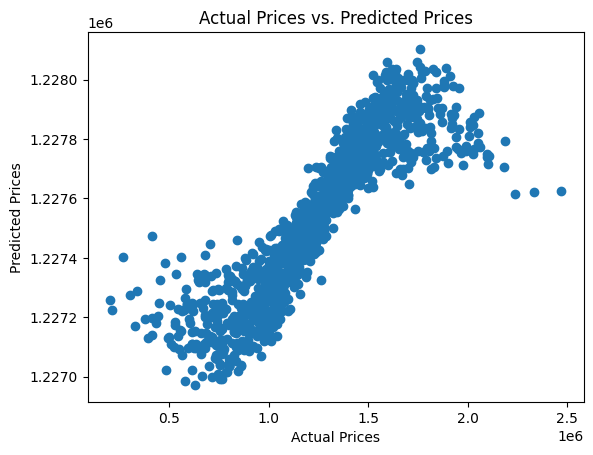

In [12]:
# Scatter plot for actual vs. predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

RESIDUAL ANALYSIS

Another important aspect of model evaluation is examining the residuals, which are the differences between the actual and predicted values. A well-fitted model should have residuals close to zero and exhibit homoscedasticity (consistent spread of residuals) and normality.

This plot helps US check for patterns in the residuals. Ideally, the residuals should be randomly distributed around zero.

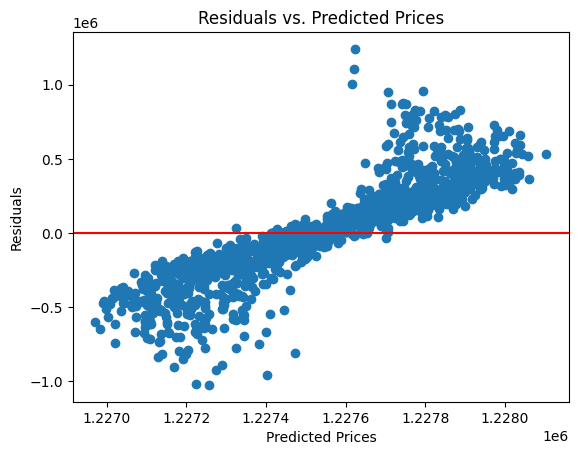

In [13]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Prices")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()